In [40]:
#Deep Learning LSTM Trainging + TEST PART 
#HARROUZ MOUAD Faculty of Science and Technology MASTER2 ISICG 20208044
#Biyuzan  HAMZA Faculty of Science and Technology Master2 ISICG 20187435
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten ,Conv2D,MaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt 
from random import randrange
from tensorflow.keras.utils import to_categorical

In [41]:
#Read File of test & training 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [42]:
#Load data 
file_test=unpickle('InputData/test_batch')
x_test=file_test[b'data']
y_test=file_test[b'labels']
y_test=np.vstack(y_test)
x_test=np.dstack((x_test[:, :1024], x_test[:, 1024:2048], x_test[:, 2048:]))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))
print("Training set Shape : ", x_test.shape," Labels Shape : ",y_test.shape)

Training set Shape :  (10000, 32, 32, 3)  Labels Shape :  (10000, 1)


In [43]:
#One hot coding for 
y_test=to_categorical(y_test,10)

In [44]:
#Normalization of input 
x_test=x_test.astype('float32')
x_test=x_test/255.0

In [45]:
#Loading a trained model 
print("=== Loading Model ===")
model_name = 'OutputData/CIFAR_CNN_BEST_DATAAUGEMENTATION_WITH_THIRD_MODEL_10.h5'
loaded_model = tf.keras.models.load_model(model_name)
print("=== Model Loaded ===")

=== Loading Model ===
=== Model Loaded ===


In [46]:
#Accuarcy & Loss 
print("=== Evaluting  Model ===")
score = loaded_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

=== Evaluting  Model ===
313/313 [==============================] - 21s 65ms/step - loss: 0.6125 - accuracy: 0.8264
Test loss: 0.6124632954597473
Test accuracy: 0.8263999819755554


In [47]:
y_test_predictions = loaded_model.predict(x_test)
y_test_predictions = np.argmax(y_test_predictions, axis=1)


In [48]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
real_class=np.argmax(y_test, axis=1)


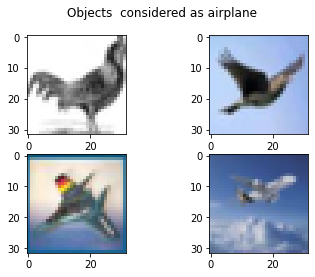

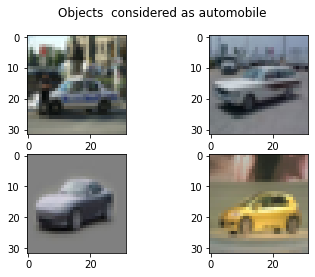

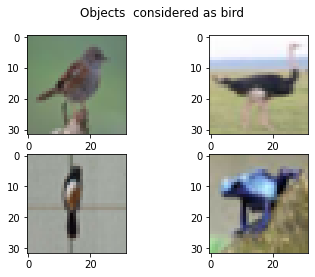

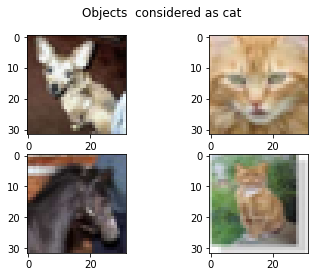

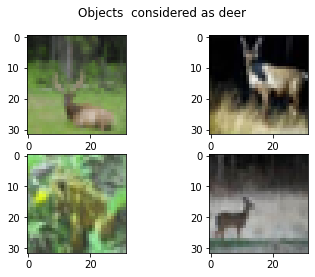

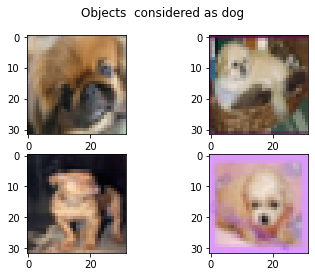

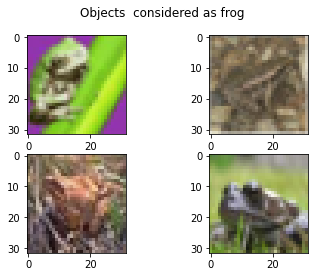

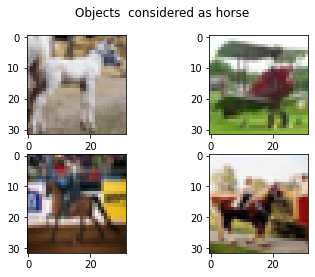

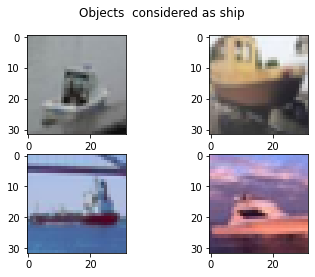

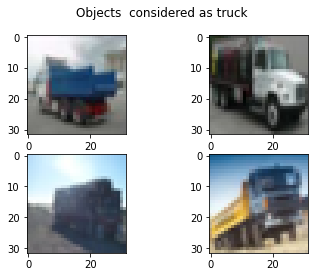

In [49]:
from random import randint
class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 images as gray scale
    for j in range(4):
      index=randint(0, len(tmp_idxs_to_use[0]))
      plt.subplot(221+j)
      plt.imshow(x_test[tmp_idxs_to_use[0][index]])
      tmp_title = 'Objects  considered as ' + classnames[int(class_to_demonstrate)]
      plt.suptitle(tmp_title)
      plt.savefig("OutputData/"+str(classnames[int(class_to_demonstrate)])+str(index)+".png")

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1

In [50]:
#all metrics 
from sklearn.metrics import classification_report
print(classification_report(real_class,y_test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.92      0.94      0.93      1000
           2       0.85      0.66      0.74      1000
           3       0.74      0.61      0.67      1000
           4       0.77      0.83      0.80      1000
           5       0.77      0.75      0.76      1000
           6       0.73      0.94      0.82      1000
           7       0.87      0.86      0.87      1000
           8       0.90      0.91      0.91      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



<Figure size 864x864 with 0 Axes>

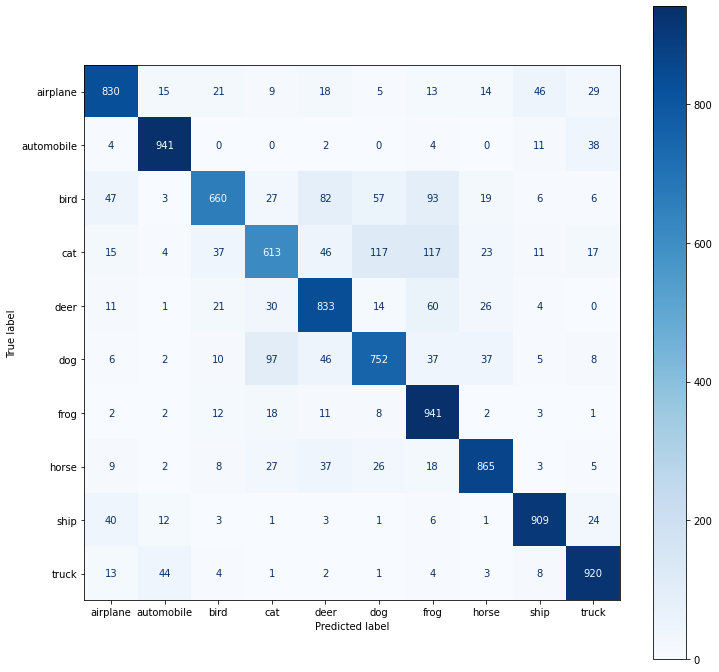

In [52]:
#Confusion Matrix 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
Matrix_confusion = confusion_matrix(real_class,y_test_predictions)
plot=ConfusionMatrixDisplay(Matrix_confusion,display_labels=classnames)
plt.figure(figsize=(12,12))
_,axe=plt.subplots(figsize=(12,12))
plot.plot(cmap=plt.cm.Blues,ax=axe)
plt.savefig("OutputData/Confusion_Matrix.png")
plt.show()
